In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from mpl_toolkits.mplot3d import Axes3D            #3D坐标系
import matplotlib 
matplotlib.rcParams['axes.unicode_minus']=False   #显示中文
import seaborn as sns 
sns.set(font= "Kaiti",style="ticks",font_scale=1.4)  #可视化主题
import missingno as msno 
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 发现缺失值 

In [12]:
oceandf = pd.read_csv(r'C:\Users\terry\Desktop\机器学习100天\Python机器学习算法与实战\program\data\chap2\热带大气海洋数据.csv')
## 判断每个变量中是否存在缺失值
pd.isna(oceandf).sum()


Year               0
Latitude           0
Longitude          0
SeaSurfaceTemp     3
AirTemp           81
Humidity          93
UWind              0
VWind              0
dtype: int64

## 查看缺失的分布

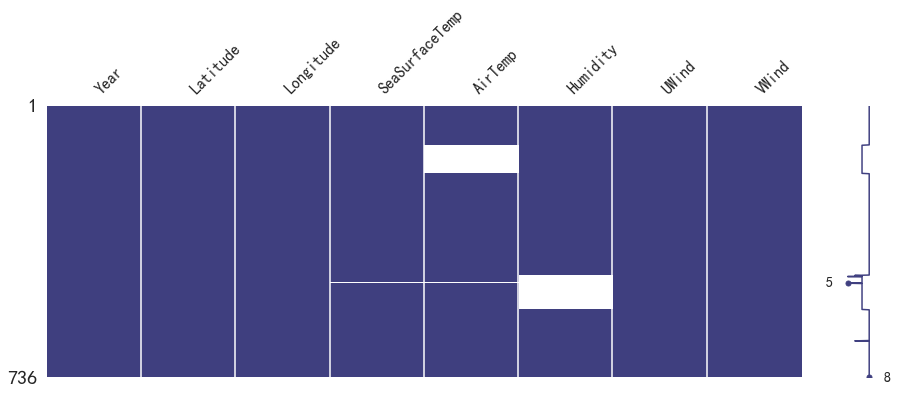

In [27]:
#plt.figure(figsize=(10,5))
msno.matrix(oceandf,figsize=(15,5),color=((0.25,0.25,0.5)))

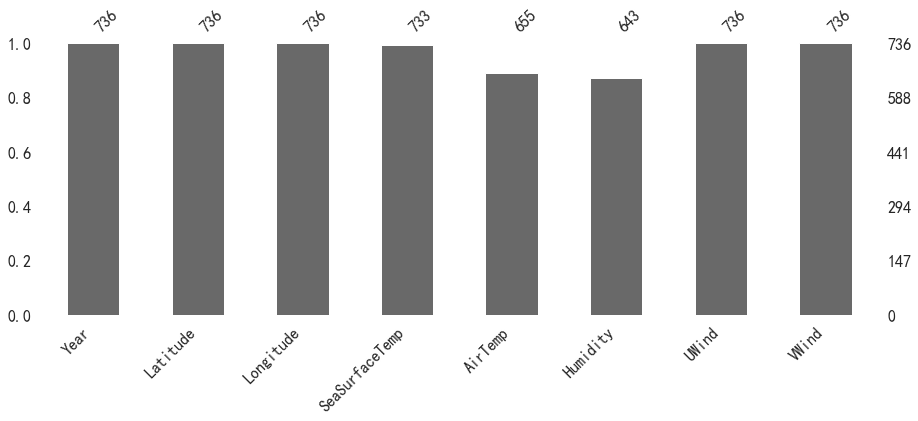

In [34]:
msno.bar(oceandf,figsize=(15,5))

## 剔除缺失值
数据中较少样本有缺失值时，剔除行

较多则剔除列

In [41]:
dfdp0=oceandf.dropna(axis=0) #剔除行

dfdp0.isnull().sum()

dfdp1=oceandf.dropna(axis=1) #剔除列

Year              0
Latitude          0
Longitude         0
SeaSurfaceTemp    0
AirTemp           0
Humidity          0
UWind             0
VWind             0
dtype: int64

## 对缺失值进行插补

### 可视化显示剔除缺失值之后的数据

<Figure size 720x504 with 0 Axes>

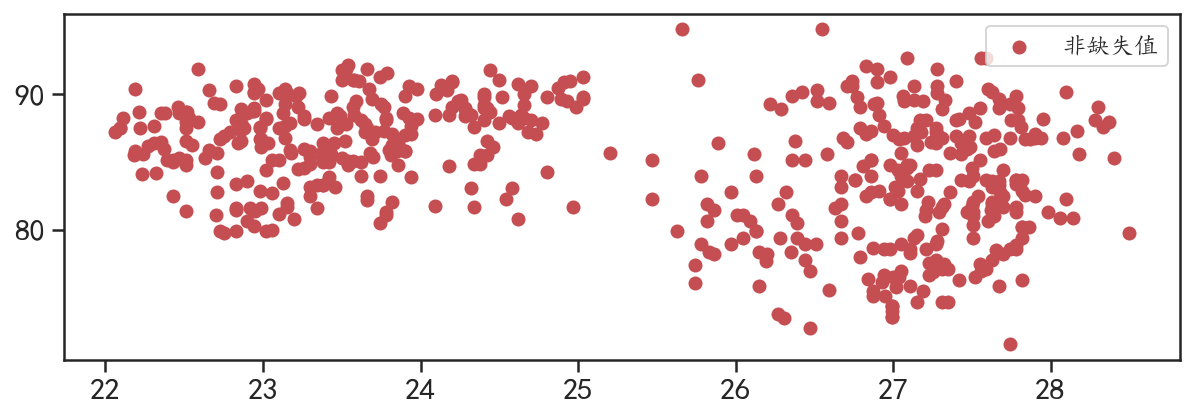

In [65]:
nanindex=oceandf.AirTemp.isnull()|oceandf.Humidity.isnull()
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.scatter(oceandf.AirTemp[~nanindex],oceandf.Humidity[~nanindex],marker='o',c='r',label='非缺失值')
plt.legend(loc = "upper right",fontsize = 12)
#plt.scatter()会自动不显示带有缺失值的点
# plt.subplot(2,1,2)
# plt.scatter(oceandf.AirTemp,oceandf.Humidity,marker='o',c='r',label='非缺失值')


### 使用.fillna()进行数据插补

#### method='ffill'

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

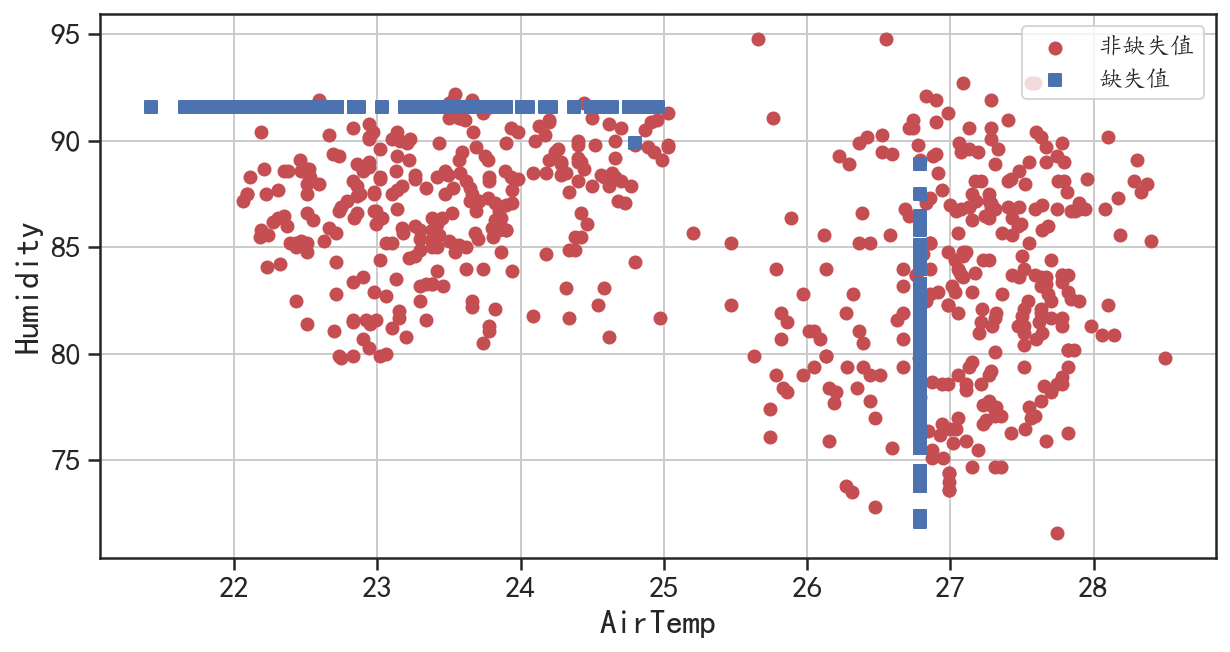

In [110]:


oceandff=oceandf.fillna(axis=0,method='ffill')
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(oceandf.AirTemp,oceandf.Humidity,marker='o',c='r',label='非缺失值')
plt.scatter(oceandff.AirTemp[nanindex],oceandff.Humidity[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc = "upper right",fontsize = 12)

#### method='bfill'

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

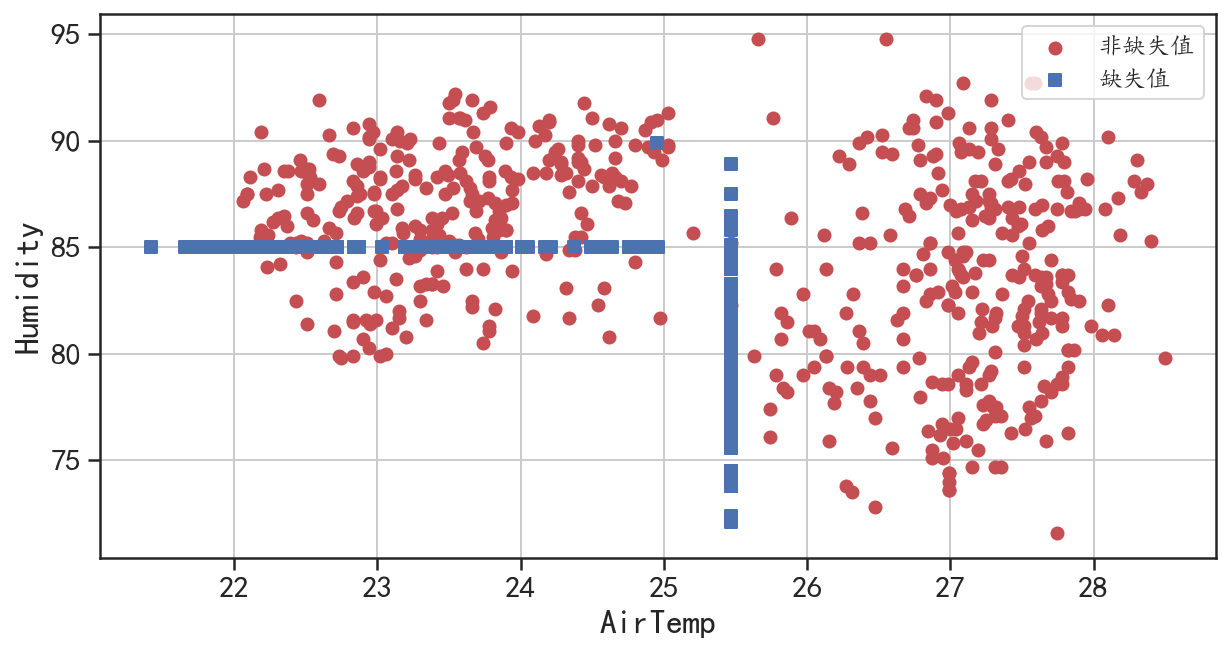

In [111]:
oceandff=oceandf.fillna(axis=0,method='bfill')
plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(oceandf.AirTemp,oceandf.Humidity,marker='o',c='r',label='非缺失值')
plt.scatter(oceandff.AirTemp[nanindex],oceandff.Humidity[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc = "upper right",fontsize = 12)

#### 均值填补

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

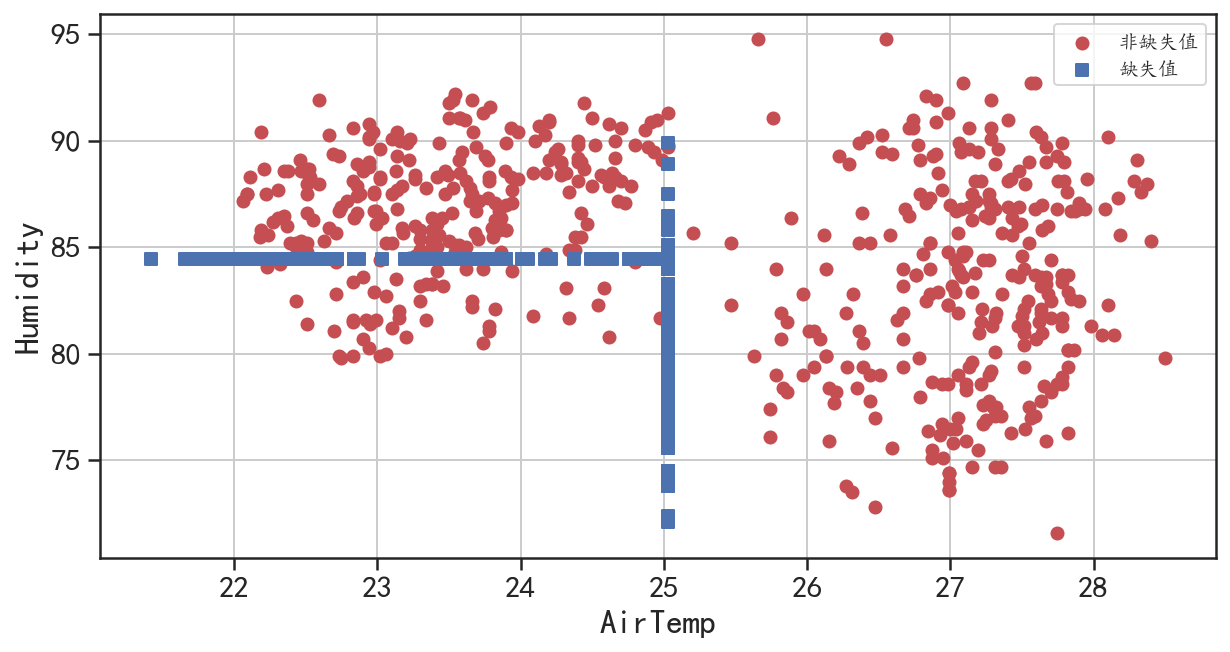

In [112]:
Amean=oceandf.AirTemp.mean()
Hmean=oceandf.Humidity.mean()

Afill=oceandf.AirTemp.fillna(Amean)

Hfill=oceandf.Humidity.fillna(Hmean)

plt.figure(figsize=(10,5))
plt.grid()
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(Afill[~nanindex],Hfill[~nanindex],marker='o',c='r',label='非缺失值')
plt.scatter(Afill[nanindex],Hfill[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc='upper right',fontsize=10)
#---------------------------------------------------------------------------------
#也可以使用SimpleImputer实现均值填补，中位数填补，众数填补
# import numpy as np
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer

# imputer2= SimpleImputer(strategy='mean')

# Sioceandf=imputer2.fit_transform(oceandf)  #类型为numpy.ndarray
# # type(Itoceandf)
# AirTemp2=Sioceandf[:,4]
# Humanity2=Sioceandf[:,5]
# plt.figure(figsize=(10,5))
# plt.grid()
# plt.xlabel('AirTemp')
# plt.ylabel('Humidity')
# plt.scatter(AirTemp2[~nanindex],Humanity2[~nanindex],marker='o',c='r',label='非缺失值')
# plt.scatter(AirTemp2[nanindex],Humanity2[nanindex],marker='s',c='b',label='缺失值')
# plt.legend(loc='upper right',fontsize=12)

### 复杂方法填补 imputer

#### IterativeImputer

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'IterativeImputer')

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

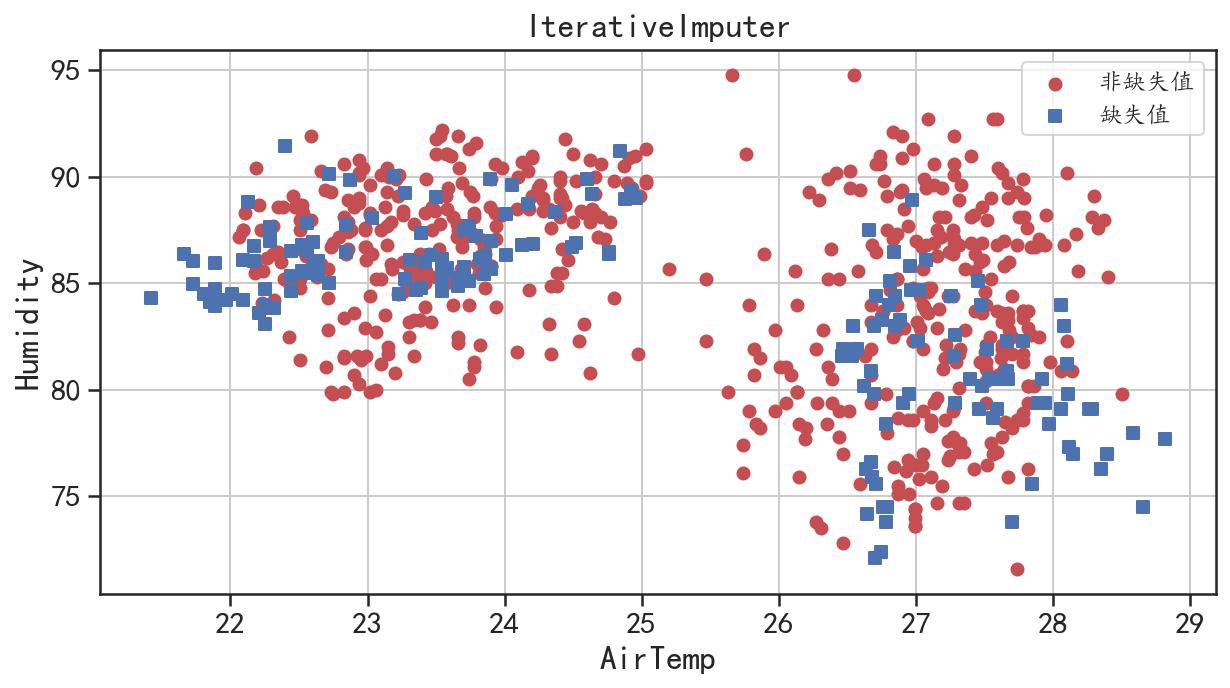

In [126]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer= IterativeImputer()

Itoceandf=imputer.fit_transform(oceandf)  #类型为numpy.ndarray
# type(Itoceandf)
AirTemp=Itoceandf[:,4]
Humanity=Itoceandf[:,5]
plt.figure(figsize=(10,5))
plt.grid()
plt.title('IterativeImputer')
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(AirTemp[~nanindex],Humanity[~nanindex],marker='o',c='r',label='非缺失值')
plt.scatter(AirTemp[nanindex],Humanity[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc='upper right',fontsize=12)

#### KNNImputer

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'KNNImputer')

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

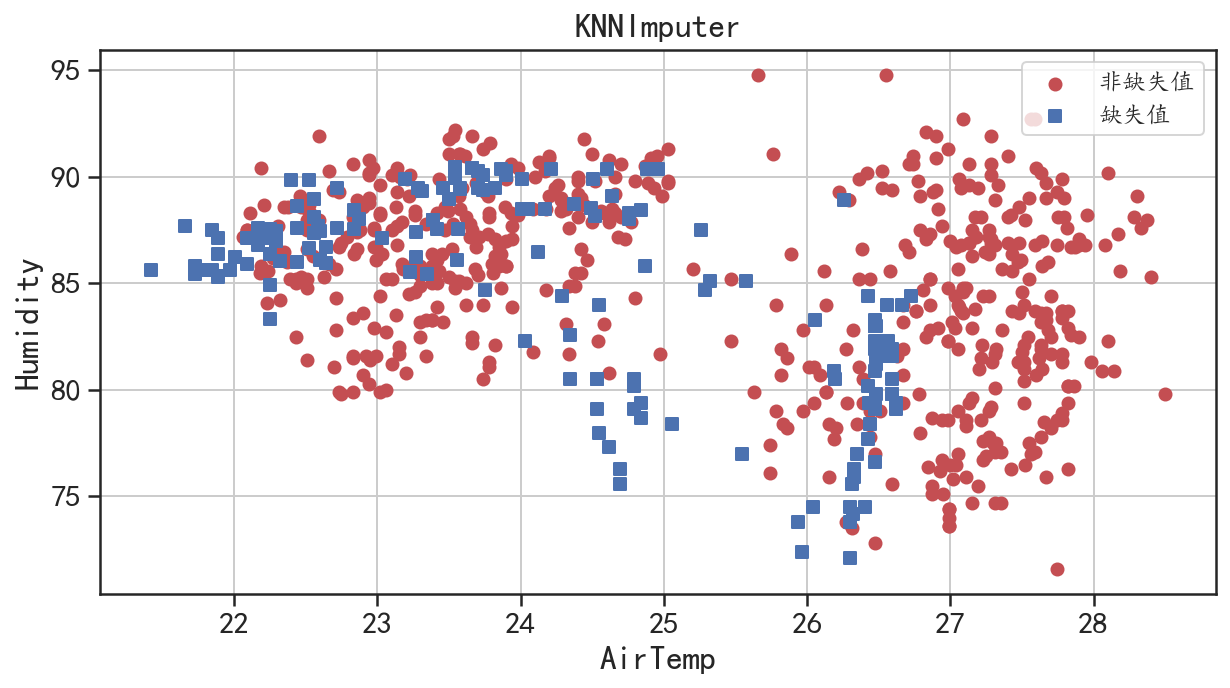

In [127]:
from sklearn.impute import KNNImputer

knnImputer=KNNImputer()

knnoceandf=knnImputer.fit_transform(oceandf)

AirTemp2=knnoceandf[:,4]

Humanity2=knnoceandf[:,5]
plt.figure(figsize=(10,5))
plt.grid()
plt.title('KNNImputer')
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(AirTemp2[~nanindex],Humanity2[~nanindex],marker='o',c='r',label='非缺失值')
plt.scatter(AirTemp2[nanindex],Humanity2[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc='upper right',fontsize=12)


#### 随机森林填补

Iteration: 0
Iteration: 1
Iteration: 2


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'forestImputer')

Text(0.5, 0, 'AirTemp')

Text(0, 0.5, 'Humidity')

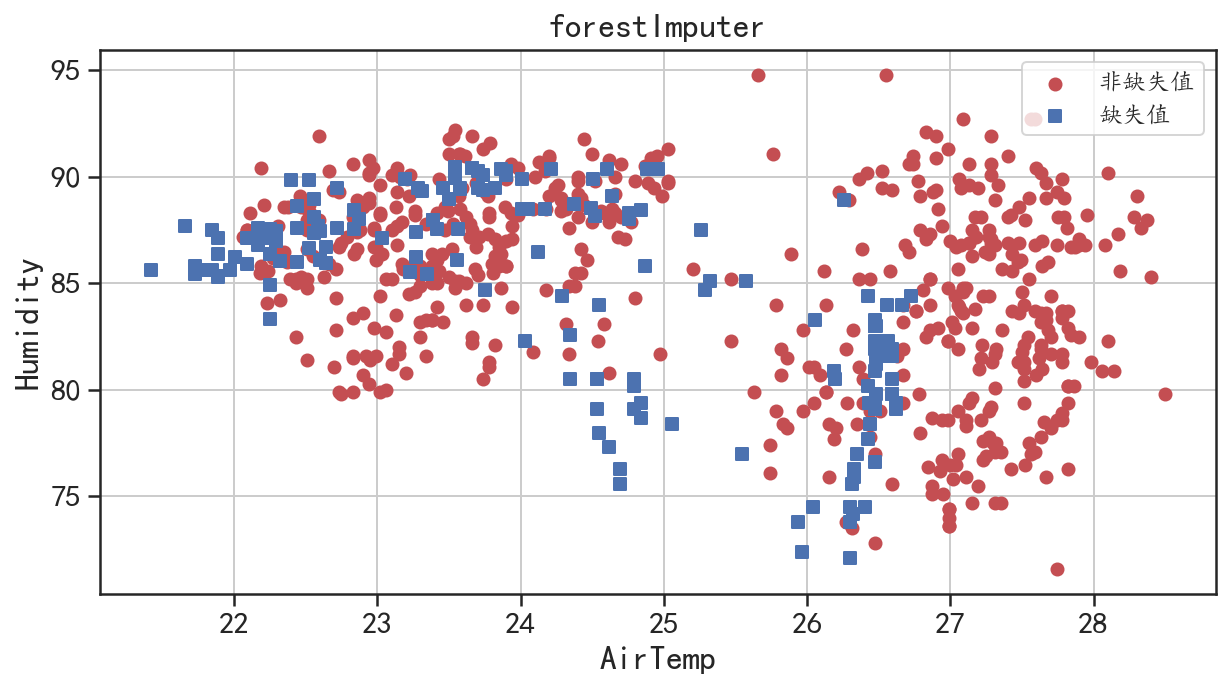

In [132]:
from missingpy import MissForest

forestImputer=MissForest()

fooceandf=forestImputer.fit_transform(oceandf)

AirTemp3=knnoceandf[:,4]

Humanity3=knnoceandf[:,5]
plt.figure(figsize=(10,5))
plt.grid()
plt.title('forestImputer')
plt.xlabel('AirTemp')
plt.ylabel('Humidity')
plt.scatter(AirTemp3[~nanindex],Humanity3[~nanindex],marker='o',c='r',label='非缺失值')
plt.scatter(AirTemp3[nanindex],Humanity3[nanindex],marker='s',c='b',label='缺失值')
plt.legend(loc='upper right',fontsize=12)
